In [349]:
import numpy as np
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from keras.datasets import mnist

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

class PCA_custom(object):
    def __init__(self, t_dim = 3, t_newDim = 2, t_nbr_samples = 20):

        self.dim = t_dim
        self.new_dim = t_newDim
        self.nbr_sample = t_nbr_samples
        
        #load mnist dataset
        (self.x_train, self.y_train), (x_test, y_test) = mnist.load_data()
        
        #self.dataset = (np.array([x.flatten() for x in self.x_train[:self.nbr_sample]])).T
        self.dataset = (np.array([x.flatten() for x in self.x_train[:self.nbr_sample]])).T
        print('loaded dataset shape : ', self.dataset.shape)
        #show 5 first images
        self.show_images_raw(5)
        
        #using pca lib to calculate variance ratio evolution
        #self.calculate_variance_r(self.dataset, self.new_dim)
        
        #process the covariance matrix
        self.cov_mat = np.cov(self.dataset)
        print('cov matrix shape : ', self.cov_mat.shape)
        
        #get the eig values/vectors
        self.eig_val, self.eig_vec = np.linalg.eig(self.cov_mat)
        self.eig_val = np.real(self.eig_val)
        self.eig_vec = np.real(self.eig_vec)
        
        self.sorted_vectors = np.array([x[1] for x in sorted(zip(self.eig_val, self.eig_vec), key=lambda x: x[0])])
        self.show_eig_val()
        
        #extract the "t_newDim" best eig values        
        self.sorted_vectors = self.sorted_vectors[:t_newDim].T
        print('\nSorted vector shape: ', self.sorted_vectors.shape)
        print('\nProjection in : ', t_newDim, 'dimension...')
        
        #transform the matrix
        self.transformed_dataset = np.dot(self.dataset.T, np.transpose(self.sorted_vectors).T)
        print('\n transformed dataset shape : \n', self.transformed_dataset.shape)
        self.show_samples()
        
        #decompress data
        self.decompressed = np.dot(self.transformed_dataset, self.sorted_vectors.T)
        self.show_images_transformed(10)
        
    def show_samples(self):
        
        plt.scatter(self.transformed_dataset[:, 1],
                    self.transformed_dataset[:, 0],
                    c=self.y_train,
                    cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
        plt.xlabel('component 2')
        plt.ylabel('component 1')
        plt.title('projection in 2D')
        plt.colorbar();
        plt.show()

    def show_eig_val(self):
        # graph of the eig val
        plt.plot(sorted(self.eig_val, reverse=True))
        plt.title('Valeurs propres ordonnées')
        plt.xlim(0, self.dim)
        plt.show()
    
    def show_images_raw(self, n):
        plt.figure(figsize=(20, 4))
        for i,image in enumerate(self.x_train[:10]) :
            # display original
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(image.reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
        
    def show_images_transformed(self, n):
        plt.figure(figsize=(20, 4))
        for i,image in enumerate(self.decompressed[:10]) :
            # display original
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(np.array(image, dtype=int).reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
        
    def calculate_variance_r(self, n):
        ratios = list()
        for i in range(n):
            pca = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(self.x_train)
            x_train_pca = pca.transform(self.x_train)
            ratios.append(pca.explained_variance_ratio_.sum())

        plt.plot(sorted(ratios, reverse=True))
        plt.ylabel('accuracy ratio per amout of component')
        plt.show()

loaded dataset shape :  (784, 60000)


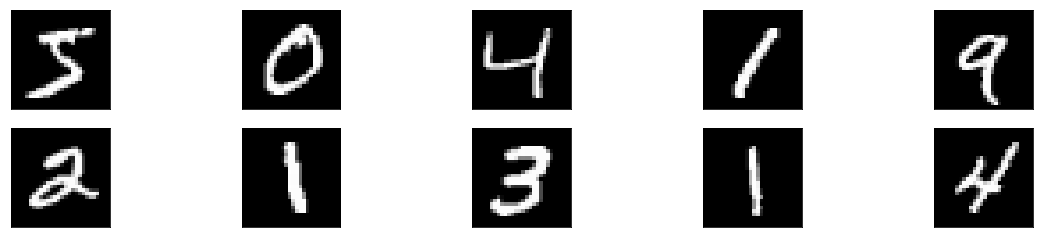

cov matrix shape :  (784, 784)


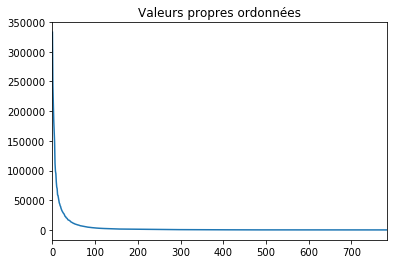


Sorted vector shape:  (784, 50)

Projection in :  50 dimension...

 transformed dataset shape : 
 (60000, 50)


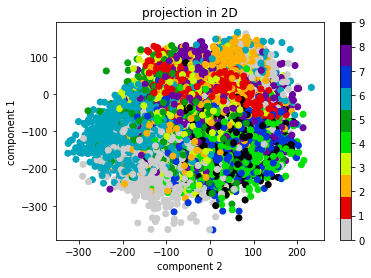

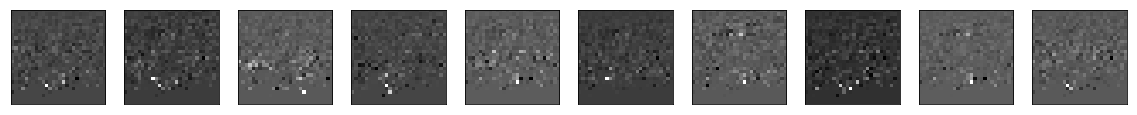

In [354]:
PCA_custom( t_dim = 784, t_nbr_samples = 60000, t_newDim = 50)